# Lambda calculus (NLTK 10.4)

## 1. Warming up: representing expressions in lambda calculus

Let's read a string representing a lambda expression into an NLTK object.

In [1]:
import nltk
read_expr = nltk.sem.Expression.fromstring
expr = read_expr(r'\x.(walk(x) & chew_gum(x))') # Use raw string so that \ is interpreted properly.
expr

<LambdaExpression \x.(walk(x) & chew_gum(x))>

In [2]:
expr.free()

set()

In [3]:
print(read_expr(r'\x.(walk(x) & chew_gum(y))'))

\x.(walk(x) & chew_gum(y))


Expressions can be beta-reduced with the simplify() method.

In [4]:
expr = read_expr(r'\x.(walk(x) & chew_gum(x))(gerald)')
print(expr)

\x.(walk(x) & chew_gum(x))(gerald)


In [5]:
print(expr.simplify())

(walk(gerald) & chew_gum(gerald))


Note that lambdas can be nested and hence the simply() procedure may be called more than once.

In [6]:
print(read_expr(r'\x.\y.(dog(x) & own(y, x))(cyril)').simplify())

\y.(dog(cyril) & own(y,cyril))


In [7]:
print(read_expr(r'\x y.(dog(x) & own(y, x))(cyril, angus)').simplify())

(dog(cyril) & own(angus,cyril))


When performing beta-reduction we sometimes need to rename the variables. This is known as alpha-conversion.

In [8]:
expr1 = read_expr('exists x.P(x)')
print(expr1)

exists x.P(x)


In [9]:
expr2 = expr1.alpha_convert(nltk.sem.Variable('z'))
print(expr2)

exists z.P(z)


In [10]:
t = expr1 == expr2
print(t)
# True, hence the expressions are logically equivalent

True


This, however, is already implemented in simplify().

In [11]:
expr3 = read_expr('\P.(exists x.P(x))(\y.see(y, x))')
print(expr3)

(\P.exists x.P(x))(\y.see(y,x))


In [12]:
print(expr3.simplify())

exists z1.see(z1,x)


In (\y.see(y,x), x is not bound and hence we must rename one of the x's (automatically) to a different name, otherwise it would become bound. 

In the previous examples we treated verbs as functions and their arguments as function arguments:

`\x y.(dog(x) & own(y, x))(cyril, angus)`

However, the flexibility of lambda calculus (since arguments of functions can also be functions) allows us also to do the other way around. This is known as type-raising as shown in the following example. Here we take the subject to be a function that takes the VP (another function) as its argument. The final result obtained through beta reduction is the same.

In [13]:
expr4 = read_expr('\P.(P(cyril))(\y.see(y, x))')
print(expr4)
print(expr4.simplify())

\P.P(cyril)(\y.see(y,x))
see(cyril,x)


Ups! But we still have one problem: how do we combine the object of the transitive verb `x` if this is not a proper name but a quantified NP. We need to turn the VP into a function that will plug in a quantified NP in the above representation. Let's go back to my slides to see how to do this.

## 2. From grammar to first order logic to evaluation in the model

In [14]:
import nltk
from nltk import load_parser
from IPython.display import display # for drawing trees
#parser = load_parser('grammars/book_grammars/simple-sem.fcfg', trace=0)
parser = load_parser('file:simple-sem.fcfg', trace=0)
sentence = 'Angus gives a bone to every dog'
tokens = sentence.split()
for tree in parser.parse(tokens):
    print(tree.label()['SEM'])

all z3.(dog(z3) -> exists z2.(bone(z2) & give(angus,z2,z3)))


We've done it! But how was the functional application performed? Let's print all the nodes in the tree. The nodes are already beta-reduced. As an exercise, go throught the beta-reduction on paper.

(S[SEM=<all z5.(dog(z5) -> exists z4.(bone(z4) & give(angus,z4,z5)))>]
  (NP[-LOC, NUM='sg', SEM=<\P.P(angus)>]
    (PropN[-LOC, NUM='sg', SEM=<\P.P(angus)>] Angus))
  (VP[NUM='sg', SEM=<\x.all z5.(dog(z5) -> exists z4.(bone(z4) & give(x,z4,z5)))>]
    (DTV[NUM='sg', SEM=<\Y X x.X(\z.Y(\y.give(x,y,z)))>, TNS='pres']
      gives)
    (NP[NUM='sg', SEM=<\Q.exists x.(bone(x) & Q(x))>]
      (Det[NUM='sg', SEM=<\P Q.exists x.(P(x) & Q(x))>] a)
      (Nom[NUM='sg', SEM=<\x.bone(x)>]
        (N[NUM='sg', SEM=<\x.bone(x)>] bone)))
    (PP[SEM=<\Q.all x.(dog(x) -> Q(x))>, +TO]
      (P[+to] to)
      (NP[NUM='sg', SEM=<\Q.all x.(dog(x) -> Q(x))>]
        (Det[NUM='sg', SEM=<\P Q.all x.(P(x) -> Q(x))>] every)
        (Nom[NUM='sg', SEM=<\x.dog(x)>]
          (N[NUM='sg', SEM=<\x.dog(x)>] dog))))))


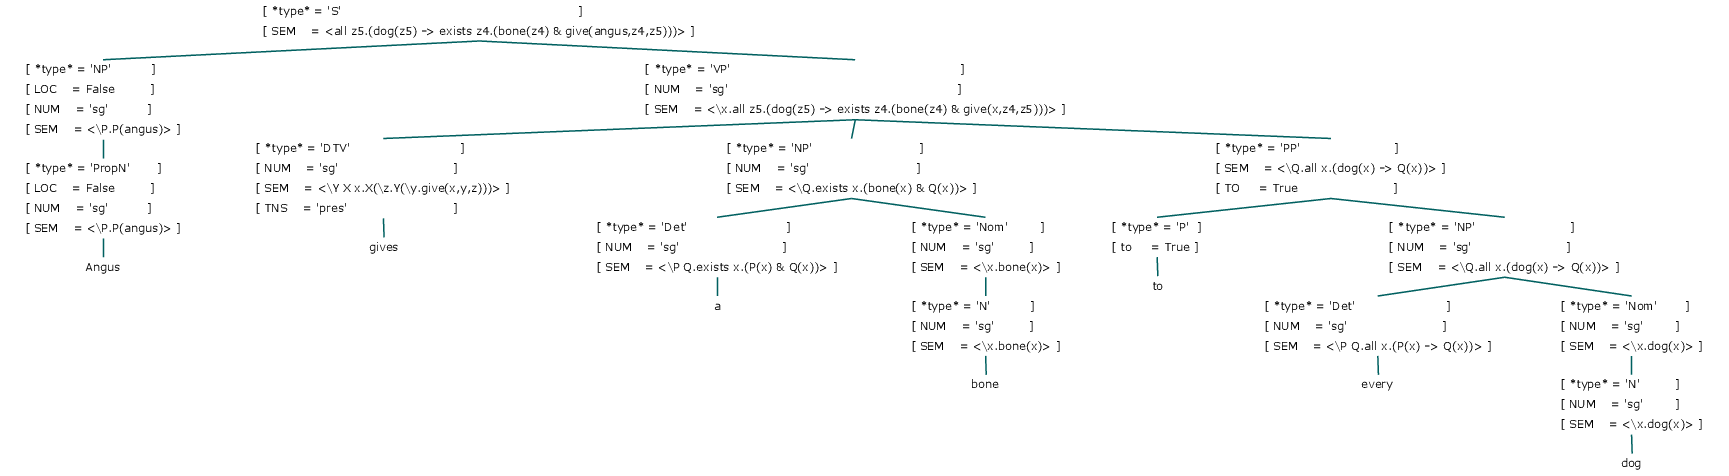

In [15]:
for tree in parser.parse(tokens):
    print(tree)
    display(tree) # draws a tree, requires py38-tkinter for Tcl/Tk) and xorg

Note that the parser returned **only one syntactic and semantic parse** but we would expect more. First of all, the sentence could be syntactically ambiguous and therefore this would give us several trees. In this simple grammar and sentence this is not the case. However, we would expect 3! = 6 readings for different quantifier scopings. We will look at a mechanism how to deal with this next time.

Deriving semantic representations for a group of sentences...

(S[SEM=<walk(irene)>]
  (NP[-LOC, NUM='sg', SEM=<\P.P(irene)>]
    (PropN[-LOC, NUM='sg', SEM=<\P.P(irene)>] Irene))
  (VP[NUM='sg', SEM=<\x.walk(x)>]
    (IV[NUM='sg', SEM=<\x.walk(x)>, TNS='pres'] walks)))
walk(irene)


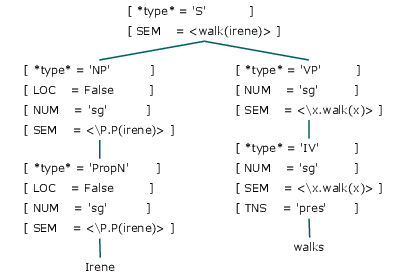

(S[SEM=<exists z6.(ankle(z6) & bite(cyril,z6))>]
  (NP[-LOC, NUM='sg', SEM=<\P.P(cyril)>]
    (PropN[-LOC, NUM='sg', SEM=<\P.P(cyril)>] Cyril))
  (VP[NUM='sg', SEM=<\x.exists z6.(ankle(z6) & bite(x,z6))>]
    (TV[NUM='sg', SEM=<\X x.X(\y.bite(x,y))>, TNS='pres'] bites)
    (NP[NUM='sg', SEM=<\Q.exists x.(ankle(x) & Q(x))>]
      (Det[NUM='sg', SEM=<\P Q.exists x.(P(x) & Q(x))>] an)
      (Nom[NUM='sg', SEM=<\x.ankle(x)>]
        (N[NUM='sg', SEM=<\x.ankle(x)>] ankle)))))
exists z6.(ankle(z6) & bite(cyril,z6))


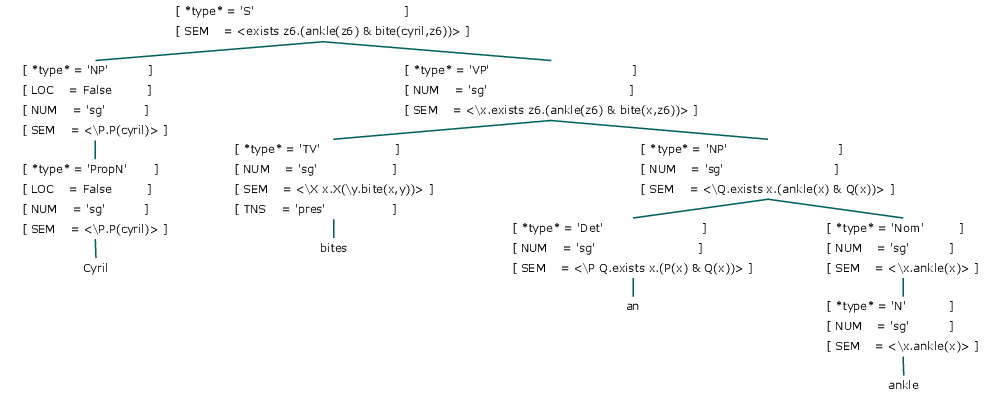

In [16]:
sents = ['Irene walks', 'Cyril bites an ankle']
#grammar_file = 'grammars/book_grammars/simple-sem.fcfg'
grammar_file = 'file:simple-sem.fcfg'
for results in nltk.interpret_sents(sents, grammar_file):
    for (synrep, semrep) in results:
        print(synrep) # prints the tree
        print(semrep) # prints the SEM feature of a tree
        display(synrep) # draws a tree, requires py38-tkinter for Tcl/Tk) and xorg

Let's now have a look how we can evaluate the representation of sentences in a model. As before we define model as a tuple which consists of valuation and the domain (here created automatically from the valuation).

In [17]:
v = """
bertie => b
olive => o
cyril => c
boy => {b}
girl => {o}
dog => {c}
walk => {o, c}
see => {(b, o), (c, b), (o, c)}
 """

val = nltk.Valuation.fromstring(v)
g = nltk.Assignment(val.domain)
m = nltk.Model(val.domain, val)
sent = 'Cyril sees every boy'
#grammar_file = 'grammars/book_grammars/simple-sem.fcfg'
grammar_file = 'file:simple-sem.fcfg'
results = nltk.evaluate_sents([sent], grammar_file, m, g)[0]
for (syntree, semrep, value) in results:
     print(semrep)
     print(value)

all z7.(boy(z7) -> see(cyril,z7))
True


The grammar from simple-sem.fcfg is as follows:

In [18]:
from nltk.data import show_cfg
#show_cfg('grammars/book_grammars/simple-sem.fcfg')
show_cfg('file:simple-sem.fcfg')

% start S
# Grammar Rules
S[SEM = <?subj(?vp)>] -> NP[NUM=?n,SEM=?subj] VP[NUM=?n,SEM=?vp]
NP[NUM=?n,SEM=<?det(?nom)> ] -> Det[NUM=?n,SEM=?det]  Nom[NUM=?n,SEM=?nom]
NP[LOC=?l,NUM=?n,SEM=?np] -> PropN[LOC=?l,NUM=?n,SEM=?np]
Nom[NUM=?n,SEM=?nom] -> N[NUM=?n,SEM=?nom]
VP[NUM=?n,SEM=?v] -> IV[NUM=?n,SEM=?v]
VP[NUM=?n,SEM=<?v(?obj)>] -> TV[NUM=?n,SEM=?v] NP[SEM=?obj]
VP[NUM=?n,SEM=<?v(?obj,?pp)>] -> DTV[NUM=?n,SEM=?v] NP[SEM=?obj] PP[+TO,SEM=?pp]
PP[+TO, SEM=?np] -> P[+TO] NP[SEM=?np]
# Lexical Rules
PropN[-LOC,NUM=sg,SEM=<\P.P(angus)>] -> 'Angus'
PropN[-LOC,NUM=sg,SEM=<\P.P(cyril)>] -> 'Cyril'
PropN[-LOC,NUM=sg,SEM=<\P.P(irene)>] -> 'Irene'
Det[NUM=sg,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'every'
Det[NUM=pl,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'all'
Det[SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'some'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'a'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'an'
N[NUM=sg,SEM=<\x.man(x)>] -> 'man'
N[NUM=sg,SEM=<\x.girl(x)>] -> 'girl'
N[NUM=sg,SEM=<\x.b